# LightGlue-ONNX Demo
This demo shows how to export LightGlue to ONNX and perform inference with ONNXRuntime.

In [1]:
from export import export_onnx
from infer import infer
from timer import Timer

## ONNX Export
In this example we use SuperPoint features combined with LightGlue.

In [2]:
extractor_type = "superpoint"  # "disk"
extractor_path = f"weights/{extractor_type}.onnx"
lightglue_path = f"weights/{extractor_type}_lightglue.onnx"

export_onnx(
    extractor_type=extractor_type,
    extractor_path=extractor_path,
    lightglue_path=lightglue_path,
    dynamic=True,  # for dynamic image size
    max_num_keypoints=None,
)

Loaded SuperPoint model
Loaded LightGlue model


d:\anaconda\envs\cpu_env\lib\site-packages\torch\onnx\symbolic_opset9.py:5858: UserWarning: Exporting aten::index operator of advanced indexing in opset 17 is achieved by combination of multiple ONNX operators, including Reshape, Transpose, Concat, and Gather. If indices include negative values, the exported graph will produce incorrect results.
  warnings.warn(


## ONNX Inference

d:\anaconda\envs\cpu_env\lib\site-packages\onnxruntime\capi\onnxruntime_inference_collection.py:69: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


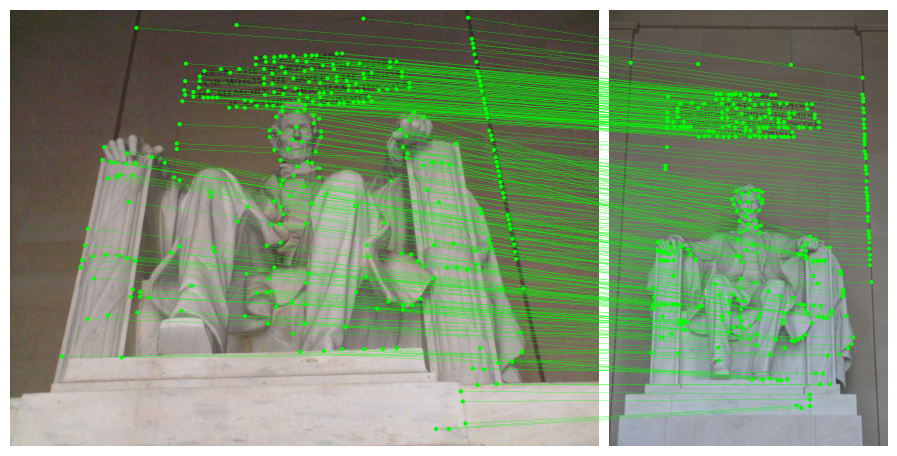

time elapsed: 1.3229259999998249 s


In [6]:
timer = Timer()
timer.start()
m_kpts0, m_kpts1 = infer(
    img_paths=["../assets/lightglue_assets/sample_image_2_0.jpg", "../assets/lightglue_assets/sample_image_2_1.jpg"],
    extractor_type=extractor_type,
    extractor_path=extractor_path,
    lightglue_path=lightglue_path,
    img_size=640,
    viz=True,
)
timer.stop()
print(f'time elapsed: {timer.elapsed_time} s')